## Sattellite Image classification

This notebook explores how deep learning can classify satellite images into different categories. It uses Convolutional Neural Networks (CNNs) to process and understand patterns in satellite imagery, providing insights for applications like environmental studies, urban planning, and disaster response.

#### Import necessary libraries

In [54]:
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#### Fetch the training Data

In [57]:
pwd

'C:\\Users\\DELL\\Edure Data Science\\06_Deep learning\\14_Capstone project\\Satellite image classification'

In [58]:
import glob

In [61]:
cloudy = glob.glob('data/cloudy/*.jpg')
desert = glob.glob('data/desert/*.jpg')
green_area = glob.glob('data/green_area/*.jpg')
water = glob.glob('data/water/*.jpg')

In [63]:
len(cloudy)

500

In [65]:
len(desert)

500

In [67]:
len(green_area)

500

In [69]:
len(water)

500

#### Fetch the testing data

In [72]:
cloudy_test = glob.glob('data/cloudy/*.jpg')
desert_test = glob.glob('data/desert/*.jpg')
green_area_test= glob.glob('data/green_area/*.jpg')
water_test = glob.glob('data/water/*.jpg')

#### Find the number of images of all classes in the Training set

In [75]:
print(f'Number of cloudy images {len(cloudy)}')
print(f'Number of desert images {len(desert)}')
print(f'Number of green area images {len(green_area)}')
print(f'Number of water images {len(water)}')

Number of cloudy images 500
Number of desert images 500
Number of green area images 500
Number of water images 500


#### Find the number of images of all classes in the testing set

In [78]:
print(f'Number of cloudy test images {len(cloudy_test)}')
print(f'Number of desert test images {len(desert_test)}')
print(f'Number of green test area images {len(green_area_test)}')
print(f'Number of water test images {len(water_test)}')

Number of cloudy test images 500
Number of desert test images 500
Number of green test area images 500
Number of water test images 500


#### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [82]:
image = []
label = []

for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in green_area:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in water: 
    img = plt.imread(i)
    image.append(img)
    label.append(3)


#### For Testing set

In [84]:
image_test = []
label_test = []

for i in cloudy_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in desert_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in green_area_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)

for i in water_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

#### Shuffle both image list and label list (In both Training and testing set)

##### Use shuffle function from sklearn utils

In [87]:
from sklearn.utils import shuffle

In [88]:
image, label = shuffle(image, label, random_state=100)
image_test, label_test = shuffle(image_test, label_test)

In [89]:
len(label_test)

2000

#### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

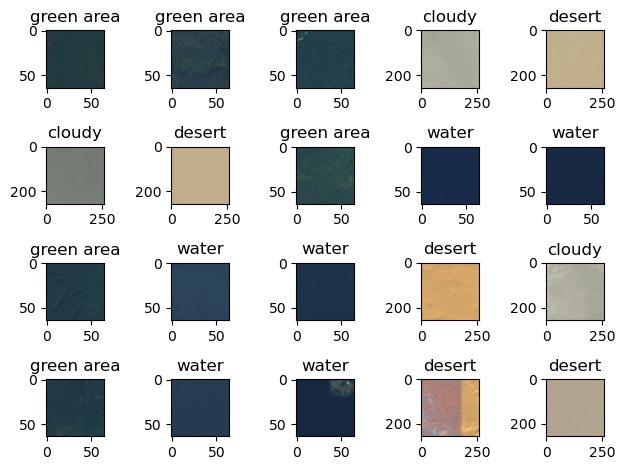

In [91]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])

    if label[i] == 0:
        plt.title('cloudy')
    elif label[i] == 1: 
        plt.title('desert')
    elif label[i] == 2:
        plt.title('green area')
    else:
        plt.title('water')
    plt.tight_layout()

#### Check the shape of the first 10 images in our list (Either from training or test set)

In [99]:
for i in range(10): 
    print(image[i].shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(256, 256, 3)
(256, 256, 4)
(256, 256, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


#### Reshape the images ( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [103]:
from skimage.transform import resize

In [105]:
xtrain = []
for i in image: 
    xtrain.append(resize(i,(256,256,3)))
xtrain = np.array(xtrain)

In [106]:
xtest = []
for i in image_test: 
    xtest.append(resize(i,(256,256,3)))
xtest = np.array(xtest)

#### create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [110]:
ytrain = np.array(label)
ytest = np.array(label_test)

#### Plot some of our reshaped images

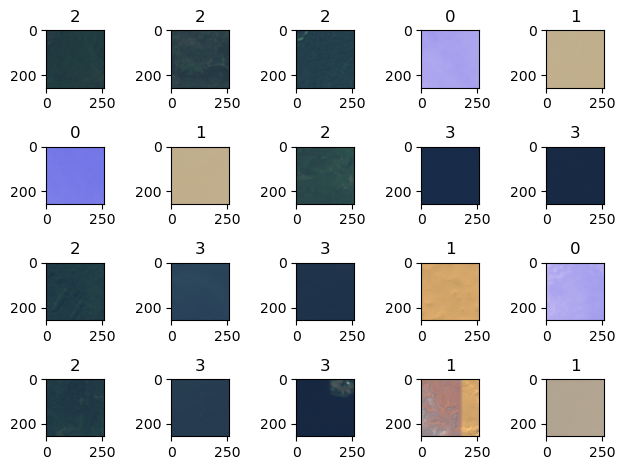

In [113]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

#### Check the shape of X_train and X_test and y_train and y_test

In [116]:
print(f'Shape of xtrain is:',xtrain.shape)
print(f'Shape of xtest is:',xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of xtrain is: (2000, 256, 256, 3)
Shape of xtest is: (2000, 256, 256, 3)
Shape of ytrain is: (2000,)
Shape of ytest is: (2000,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [119]:
from tensorflow import keras

In [120]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (256,256,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [124]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary of our model

In [127]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,924 (30.05 MB)

 Trainable params: 7,877,924 (30.05 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model.

In [137]:
model.fit(xtrain, ytrain, epochs = 6, validation_split = 0.1)

Epoch 1/6
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 453ms/step - accuracy: 0.8927 - loss: 0.2316 - val_accuracy: 0.9100 - val_loss: 0.2121
Epoch 2/6
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 634ms/step - accuracy: 0.9133 - loss: 0.1920 - val_accuracy: 0.9600 - val_loss: 0.1422
Epoch 3/6
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 409ms/step - accuracy: 0.9353 - loss: 0.1488 - val_accuracy: 0.9200 - val_loss: 0.1704
Epoch 4/6
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 386ms/step - accuracy: 0.9431 - loss: 0.1441 - val_accuracy: 0.9100 - val_loss: 0.1533
Epoch 5/6
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 389ms/step - accuracy: 0.9455 - loss: 0.1198 - val_accuracy: 0.9350 - val_loss: 0.1403
Epoch 6/6
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 385ms/step - accuracy: 0.9508 - loss: 0.1181 - val_accuracy: 0.9250 - val_loss: 0.1780


#### Evaluate the model

In [140]:
model.evaluate(xtrain, ytrain)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9300 - loss: 0.1516


[0.16449089348316193, 0.9235000014305115]

#### Make predictions with X_test

In [143]:
ypred = model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step


#### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [147]:
ypred = ypred.argmax(axis=1)

In [149]:
ypred

array([3, 1, 3, ..., 0, 2, 0], dtype=int64)

#### Plot X_test with label from our prediction

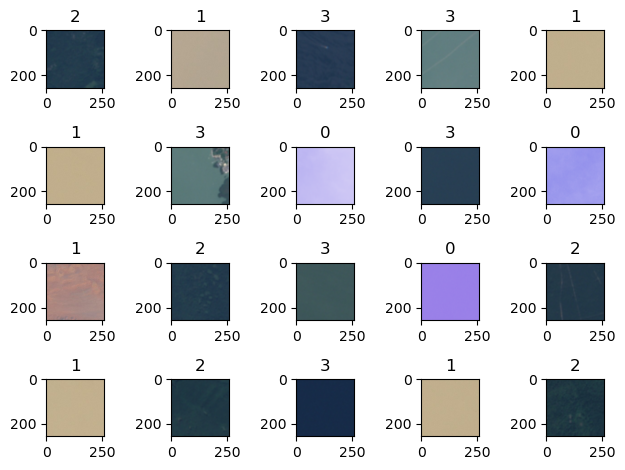

In [151]:
for i in range(20): 
    plt.subplot(4, 5, i+1)
    plt.imshow(xtest[i])
    plt.title(label_test[i])
    plt.tight_layout()

#### Visualise confusion matrix on a heatmap

In [153]:
from sklearn.metrics import ConfusionMatrixDisplay

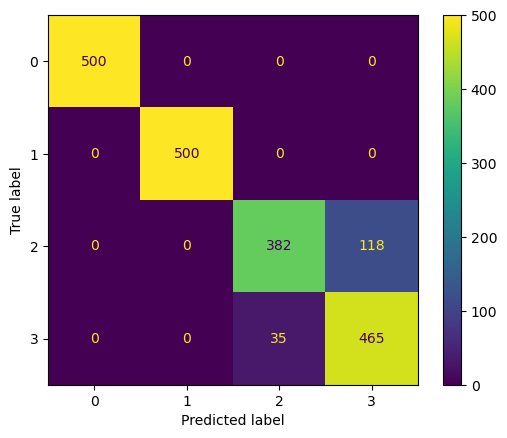

In [155]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)

In [157]:
from sklearn.metrics import classification_report,accuracy_score

In [159]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       0.92      0.76      0.83       500
           3       0.80      0.93      0.86       500

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

